# SI 618: Data Manipulation and Analysis
## 03 - Pandas 2
### Dr. Chris Teplovs, School of Information, University of Michigan

<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
    
Version 2024.09.12.2.CT

In [1]:
import pandas as pd
import numpy as np

## Loading and Manipulating Data in Pandas

### Learning Objectives
* load CSV files
* load JSON files
* use pd.read_html to extract tables from web pages
* handle missing data (dropna and fillna)
* use vectorized string functions
* use Pandas' apply function to run a function on each row of a dataframe
* view and set the indexes of a dataframe, including hierarchical indexes
* use loc to explore a dataframe with hierarchical indexes
* use stack and unstack to reshape dataframes
* concatenate two DataFrames by columns
* use Pandas' merge function to join dataframes in a SQL-like way
* use the .describe() function
* understand .groupby()
* know how to use pivot and pivot_table

Recall the ```pd.read_csv``` function that we used to load data sets in previous classes:

In [2]:
titles = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/titles.csv') 

In [3]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


That works great for well-formatted CSV files, but what happens when you get something that looks like the ```data/avocado_eu.csv``` file.

If you're using JupyterLab, go ahead and browse that in JupyterLab's CSV browser.  You'll notice a new drop-down menu labelled "Delimiter".  Go ahead and change that to ```;```.

Referring back to your readings and the [read_csv documentation online](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), complete the following exercise

Read the data/avocado_eu.csv file into a pandas DataFrame and show the first 5 rows.


In [7]:
avocado = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/avocado_eu.csv')
avocado.head(5)

,,,,,,,,,;Date;AveragePrice;Total Volume;4046;4225;4770;Total Bags;Small Bags;Large Bags;XLarge Bags;type;year;region
0;2015-12-27;1,33;64236,62;1036,74;54454,85;48,16;8696,87;8603,62;93,25;0,0;conventional;2015;Albany
1;2015-12-20;1,35;54876,98;674,28;44638,81;58,33;9505,56;9408,07;97,49;0,0;conventional;2015;Albany
2;2015-12-13;0,93;118220,22;794,7;109149,67;130,5;8145,35;8042,21;103,14;0,0;conventional;2015;Albany
3;2015-12-06;1,08;78992,15;1132,0;71976,41;72,58;5811,16;5677,4;133,76;0,0;conventional;2015;Albany
4;2015-11-29;1,28;51039,6;941,48;43838,39;75,78;6183,95;5986,26;197,69;0,0;conventional;2015;Albany


You'll notice that, unless you did something special in the previous read_csv invocation, the decimal points don't look quite right.  Go ahead and find the right option to convert commas to periods when loading a CSV file.

### 🚀 **Challenge:** 
Read the avocado_eu.csv file into a DataFrame called "avocado" using the correct delimiter and decimal character into a dataframe and show the first 5 rows: </span>

In [6]:
avocado = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/avocado_eu.csv', delimiter=';')
avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,"1,33","64236,62","1036,74","54454,85","48,16","8696,87","8603,62","93,25","0,0",conventional,2015,Albany
1,1,2015-12-20,"1,35","54876,98","674,28","44638,81","58,33","9505,56","9408,07","97,49","0,0",conventional,2015,Albany
2,2,2015-12-13,"0,93","118220,22","794,7","109149,67","130,5","8145,35","8042,21","103,14","0,0",conventional,2015,Albany
3,3,2015-12-06,"1,08","78992,15","1132,0","71976,41","72,58","5811,16","5677,4","133,76","0,0",conventional,2015,Albany
4,4,2015-11-29,"1,28","51039,6","941,48","43838,39","75,78","6183,95","5986,26","197,69","0,0",conventional,2015,Albany


### Counting the number of values (review)

Sometimes, you'll want to count the number of times values occur.  For example, we might want to know the number of times each 'type'
is reported in our avocado data.  Use the ```value_counts()``` function on a Series to do so:

In [8]:
avocado['type'].value_counts()

KeyError: 'type'

### Loading JSON data

In addition to CSV files, JSON (JavaScript Object Notation) files or data is commonly used.  

In [9]:
nfl_football_players = pd.read_json('https://github.com/umsi-data-science/data/raw/main/nfl_football_profiles.json')

In [12]:
nfl_football_players.shape

(25043, 17)

And, just for fun, show the player with the highest Current Salary from that dataset:

In [11]:
nfl_football_players.sort_values('current_salary', ascending=False).head(1)

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year
6454,721,Jeremiah Attaochu,OLB,6-3,252.0,Los Angeles Chargers,1993-01-17,"Ibadan, Nigeria",None,Georgia Tech,"Archbishop Carroll, DE",San Diego Chargers,2.0,50.0,2014.0,"993,150",NaN


### Fixing up the data
Assuming you did something like sort_values on one of the original columns, you probably got the wrong result.

Looking a bit more closely at the results, you'll notice that the current_salary column.  Remembering that we have made the shift from pythonic to pandorable, we can leverage the impressive-sounding "vectorized string functions" mentioned in Section 7.3 of the McKinney book.  Specifically, we can use the str.replace(...) method.  Note that had we use read_csv to load the file we could have used the ```thousands=``` option and avoided all this, but sometimes data doesn't come in a convenient format.

One way to apply functions is to operate on a column and then assign the results to another column.  For example, if we wanted to eliminate commas, we could replace them with null strings

In [13]:
nfl_football_players['current_salary'].str.replace(',', '')

0           None
1           None
2        1075000
3           None
4           None
          ...   
25038       None
25039       None
25040       None
25041       None
25042       None
Name: current_salary, Length: 25043, dtype: object

And assign the results to a column in the original dataframe (in this case I'm calling the column current_salary_nocommas). We need to assign it to a column to ensure the operation is done in-place.

In [14]:
nfl_football_players['current_salary_nocommas'] = \
    nfl_football_players['current_salary'].str.replace(',', '')

In [16]:
nfl_football_players['current_salary_nocommas'].dtype

dtype('O')

But you'll notice that the type of the column is string, and we want to convert it to a float so we can sort it numerically.  So we can use the astype() function to convert it:

In [19]:
nfl_football_players['current_salary_cleaned'] = \
    nfl_football_players['current_salary'].str.replace(',', '').astype(float)

In [20]:
nfl_football_players.head(5)

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned
0,1809,Robert Blackmon,DB,6-0,208.0,None,1967-05-12,"Bay City, TX",None,Baylor,"Van Vleck, TX",Seattle Seahawks,2.0,34.0,1990.0,None,NaN,None,NaN
1,23586,Dean Wells,LB,6-3,248.0,None,1970-07-20,"Louisville, KY",None,Kentucky,"Holy Cross, KY",Seattle Seahawks,4.0,85.0,1993.0,None,NaN,None,NaN
2,355,Kiko Alonso,ILB,6-3,238.0,Miami Dolphins,1990-08-14,"Newton, MA",None,Oregon,"Los Gatos, CA",Buffalo Bills,2.0,46.0,2013.0,"1,075,000",NaN,1075000,1075000.0
3,18182,Steve Ramsey,QB,6-2,210.0,None,1948-04-22,"Dallas, TX",1999-10-15,North Texas,"W.W. Samuell, TX",New Orleans Saints,5.0,126.0,1970.0,None,NaN,None,NaN
4,16250,Cory Nelms,CB,6-0,195.0,None,1988-02-27,"Neptune, NJ",None,Miami (FL),"Neptune, NJ",None,NaN,NaN,NaN,None,NaN,None,NaN


And now we can re-run our command to sort by salary and get the correct result:

In [22]:
nfl_football_players.sort_values('current_salary_cleaned', ascending=False).head(1)

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned
17756,4644,Kirk Cousins,QB,6-3,214.0,Washington Redskins,1988-08-19,"Holland, MI",None,Michigan St.,"Holland Christian, MI",Washington Redskins,4.0,102.0,2012.0,"23,943,600",NaN,23943600,23943600.0


### Dropping missing values

In addition to the "all" or "any" functionality described in McKinney section 7.1, it's sometimes useful to drop a row only if a certain column or columns have missing data.  To do this, use the subset= option with dropna().  So, for example, to drop all players for whom we do not have salary information, we could use the following code:

In [23]:
nfl_football_players.current_salary_cleaned.isna().sum()

np.int64(23278)

In [25]:
nfl_football_players.head()

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned
0,1809,Robert Blackmon,DB,6-0,208.0,None,1967-05-12,"Bay City, TX",None,Baylor,"Van Vleck, TX",Seattle Seahawks,2.0,34.0,1990.0,None,NaN,None,NaN
1,23586,Dean Wells,LB,6-3,248.0,None,1970-07-20,"Louisville, KY",None,Kentucky,"Holy Cross, KY",Seattle Seahawks,4.0,85.0,1993.0,None,NaN,None,NaN
2,355,Kiko Alonso,ILB,6-3,238.0,Miami Dolphins,1990-08-14,"Newton, MA",None,Oregon,"Los Gatos, CA",Buffalo Bills,2.0,46.0,2013.0,"1,075,000",NaN,1075000,1075000.0
3,18182,Steve Ramsey,QB,6-2,210.0,None,1948-04-22,"Dallas, TX",1999-10-15,North Texas,"W.W. Samuell, TX",New Orleans Saints,5.0,126.0,1970.0,None,NaN,None,NaN
4,16250,Cory Nelms,CB,6-0,195.0,None,1988-02-27,"Neptune, NJ",None,Miami (FL),"Neptune, NJ",None,NaN,NaN,NaN,None,NaN,None,NaN


In [26]:
nfl_football_players_salaries = nfl_football_players.dropna(subset=['current_salary_cleaned'])

In [27]:
nfl_football_players_salaries.shape

(1765, 19)

In [28]:
foo = nfl_football_players.dropna()

In [29]:
foo.shape

(0, 19)

In [30]:
bar = np.nan

In [31]:
type(bar)

float

In [33]:
nfl_football_players_salaries.head()

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned
2,355,Kiko Alonso,ILB,6-3,238.0,Miami Dolphins,1990-08-14,"Newton, MA",None,Oregon,"Los Gatos, CA",Buffalo Bills,2.0,46.0,2013.0,"1,075,000",NaN,1075000,1075000.0
6,2701,Preston Brown,ILB,6-1,251.0,Buffalo Bills,1992-10-27,"Cincinnati, OH",None,Louisville,"Northwest, OH",Buffalo Bills,3.0,73.0,2014.0,"1,762,000",NaN,1762000,1762000.0
13,3966,Frank Clark,DE,6-2,270.0,Seattle Seahawks,1993-06-14,"Cleveland, OH",None,Michigan,"Glenville, OH",Seattle Seahawks,2.0,63.0,2015.0,"774,294",NaN,774294,774294.0
37,19449,Emmanuel Sanders,WR,5-11,186.0,Denver Broncos,1987-03-16,"Bellville, TX",None,SMU,"Bellville, TX",Pittsburgh Steelers,3.0,82.0,2010.0,"6,750,000",NaN,6750000,6750000.0
53,17858,Bilal Powell,RB,5-11,204.0,New York Jets,1988-10-27,"Lakeland, FL",None,Louisville,"Lake Gibson, FL",New York Jets,4.0,126.0,2011.0,"3,750,000",NaN,3750000,3750000.0


### Creating dummy variables

We might, on occasion, want to "bin" or "discretize" a variable.  For example, we might want to take the previous dataframe and add dummy variables that map onto whether the salaries are "small" (< \\$1M) , "medium" (\\$1M - \\$10M), or "large" (> \\$10M). A **dummy variable** is a binary indicator variable (often used in regressions) to represent a categorical variable. 

We could do something like the following (I encourage you to make detailed notes about the following lines; we do several important steps.)

In [34]:
bins = [0,1000000,10000000,1000000000]

In [35]:
pd.cut(nfl_football_players_salaries['current_salary_cleaned'],
       bins,
       labels=['small','medium','large'])

2        medium
6        medium
13        small
37       medium
53       medium
          ...  
24885     small
24917     small
24923     small
24967     small
24984    medium
Name: current_salary_cleaned, Length: 1765, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

In [36]:
dummies = pd.get_dummies(
    pd.cut(
        nfl_football_players_salaries['current_salary_cleaned'],
        bins,
        labels=['small','medium','large']))

In [37]:
print(pd.__version__)

2.2.2


In [38]:
dummies.head()

,small,medium,large
2,False,True,False
6,False,True,False
13,True,False,False
37,False,True,False
53,False,True,False


pd.concat stacks together objects along an axis _(Section 8.2 McKinney)_

In [39]:
nfl_cats = pd.concat([nfl_football_players_salaries,dummies],axis='columns')

In [40]:
nfl_cats.head()

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,...,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned,small,medium,large
2,355,Kiko Alonso,ILB,6-3,238.0,Miami Dolphins,1990-08-14,"Newton, MA",None,Oregon,...,2.0,46.0,2013.0,"1,075,000",NaN,1075000,1075000.0,False,True,False
6,2701,Preston Brown,ILB,6-1,251.0,Buffalo Bills,1992-10-27,"Cincinnati, OH",None,Louisville,...,3.0,73.0,2014.0,"1,762,000",NaN,1762000,1762000.0,False,True,False
13,3966,Frank Clark,DE,6-2,270.0,Seattle Seahawks,1993-06-14,"Cleveland, OH",None,Michigan,...,2.0,63.0,2015.0,"774,294",NaN,774294,774294.0,True,False,False
37,19449,Emmanuel Sanders,WR,5-11,186.0,Denver Broncos,1987-03-16,"Bellville, TX",None,SMU,...,3.0,82.0,2010.0,"6,750,000",NaN,6750000,6750000.0,False,True,False
53,17858,Bilal Powell,RB,5-11,204.0,New York Jets,1988-10-27,"Lakeland, FL",None,Louisville,...,4.0,126.0,2011.0,"3,750,000",NaN,3750000,3750000.0,False,True,False


In [78]:
# nfl_football_players.value_counts('height', dropna=False)
nfl_football_players['height'].head(5)

0    6-0
1    6-3
2    6-3
3    6-2
4    6-0
Name: height, dtype: object

### Challenge
Create a new dataframe that contains all the columns in the nfl_football_players dataframe as well as an additional column that contains each player's height in centimeters. Show the first 5 rows of your result. </span>

**Hints:** 
- 1 inch = 2.54 cm
- you can use the vectorized string function str.split() to separate feet and inches from the original dataframe column
- remember to cast strings to numeric types if you're going to perform math on them
- you might want to create an intermediate (temporary) DataFrame to help you keep things clear instead of attempting to do 
this in one line

In [88]:
# insert your code here
# nfl_football_players.column
def height_to_inches(height): # suggested by copilot and modified by fb
    if pd.isna(height): # added check
        return np.nan
    feet, inches = height.split('-')
    return (int(feet) * 12) + int(inches)

# convert to cm
def in_to_cm(inches):
    return inches * 2.54

nfl_football_players['height_inches'] = nfl_football_players['height'].apply(height_to_inches)
# print(nfl_football_players['height_inches'].head(5))
nfl_football_players['height_cm'] = nfl_football_players['height_inches'].apply(in_to_cm)
nfl_football_players.head(5)

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,...,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned,height_inches,height_cm
0,1809,Robert Blackmon,DB,6-0,208.0,None,1967-05-12,"Bay City, TX",None,Baylor,...,Seattle Seahawks,2.0,34.0,1990.0,None,NaN,None,NaN,72.0,182.88
1,23586,Dean Wells,LB,6-3,248.0,None,1970-07-20,"Louisville, KY",None,Kentucky,...,Seattle Seahawks,4.0,85.0,1993.0,None,NaN,None,NaN,75.0,190.50
2,355,Kiko Alonso,ILB,6-3,238.0,Miami Dolphins,1990-08-14,"Newton, MA",None,Oregon,...,Buffalo Bills,2.0,46.0,2013.0,"1,075,000",NaN,1075000,1075000.0,75.0,190.50
3,18182,Steve Ramsey,QB,6-2,210.0,None,1948-04-22,"Dallas, TX",1999-10-15,North Texas,...,New Orleans Saints,5.0,126.0,1970.0,None,NaN,None,NaN,74.0,187.96
4,16250,Cory Nelms,CB,6-0,195.0,None,1988-02-27,"Neptune, NJ",None,Miami (FL),...,None,NaN,NaN,NaN,None,NaN,None,NaN,72.0,182.88


### Scraping Tables from HTML

The ```pd.read_html``` function returns a list of DataFrames read from an HTML source.  The following line will return a list of DataFrames from https://en.wikipedia.org/wiki/List_of_largest_sports_contracts

Note that you will need to install the lxml package to use this function, which you should have done earlier.  If you didn't, you can do so by running the following cell:

In [56]:
import pandas as pd

In [57]:
contracts_scraped = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_sports_contracts', header=0)

In [58]:
type(contracts_scraped)

list

In [59]:
len(contracts_scraped)

3

To get the first table, you'll need to pull off the 0th element:

In [60]:
contracts = contracts_scraped[0]
contracts.head()

,Rank,Name,Organization,Sport,Length of contract,Contract value (USD),Average per year (USD),Average per game/event[a] (USD),Ref.
0,1,Shohei Ohtani,Los Angeles Dodgers,Baseball,10 years (2024–2033)[b],"$700,000,000","$70,000,000[b]","$432,099",[2]
1,2,Lionel Messi,Barcelona,Association football,4 years (2017–2021),"$674,000,000","$168,500,000","$4,434,210[c]",[3]
2,3,Cristiano Ronaldo,Al Nassr,Association football,2.5 years (2023–2025)[d],"$536,336,818","$214,534,727","$7,151,158[e]",[4]
3,4,Patrick Mahomes[f]‡,Kansas City Chiefs,American football,10 years (2020–2031),"$450,000,000","$45,000,000","$2,465,686[g]",[5]
4,5,Karim Benzema,Al-Ittihad,Association football,2 years (2023–2025),"$447,302,608","$223,651,304","$7,455,043[h]",[4]


### 🚀 **Challenge:** 
Count the number of players from each sport in the List of Largest Sports Contracts. 
Hint:  see value_counts() description above
<font>

In [67]:
# insert your code here
# contracts.groupby('Sport').agg({'Name':'count'}).sort_values('Name', ascending=False)
contracts.Sport.value_counts(normalize=True)

Sport
Baseball                0.46
Basketball              0.34
American football       0.15
Association football    0.03
Boxing                  0.01
Auto racing             0.01
Name: proportion, dtype: float64

Baseball has the largest number of players.

## Joining, Combining, and Reshaping

In [89]:
import pandas as pd

* Infobox Class on html webpage
* Lebron James pictured below - Widely regarded as the greatest basketball player of all time (depending on which critics you ask)

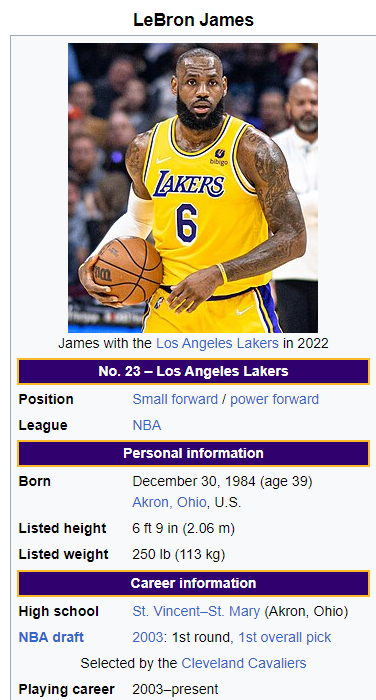

In [90]:
lebron_url = 'https://en.wikipedia.org/wiki/LeBron_James'
lebron_url = pd.read_html(lebron_url)

As you will notice in the above image, the infobox class contains the information we want.  We can use the ```pd.read_html``` function to extract this table from the webpage.  The aforementioned code will return a list of DataFrames from the URL:

Below we access the first item of the list to get the DataFrame:

In [91]:
lebron_url[0]

,0,1,2
0,James with the Los Angeles Lakers in 2022,James with the Los Angeles Lakers in 2022,NaN
1,No. 23 – Los Angeles Lakers,No. 23 – Los Angeles Lakers,NaN
2,Position,Small forward / power forward,NaN
3,League,NBA,NaN
4,Personal information,Personal information,NaN
5,Born,"December 30, 1984 (age 39) Akron, Ohio, U.S.",NaN
6,Listed height,6 ft 9 in (2.06 m),NaN
7,Listed weight,250 lb (113 kg),NaN
8,Career information,Career information,NaN
9,High school,"St. Vincent–St. Mary (Akron, Ohio)",NaN


Now let's define a function that, given a Wikipedia URL, will extract the contents of the NBA Draft component of the infobox table:

In [92]:
def get_player_draft(url):
    try:
        tables = pd.read_html(url, attrs={'class': 'infobox'})
        assert len(tables) == 1, f"{url} should only have 1 table, it has {len(tables)}"   # sanity check: we should have just 1 table
        infotable = tables[0]    # pull the first table into a DataFrame
        ret = ''                 # initialize an empty string for our return value
        x = infotable.set_index(infotable.columns[0]).loc['NBA draft'] # setting the index on column 0 will allow us to use .loc to look up the value of 'Aliases'
        ret = x.values[0]
    except Exception as e:
        print("Problem with " + url)
#        print(e.stacktrace())
        ret = 'None'
    return ret

And let's try it out:

In [93]:
lebron_url = 'https://en.wikipedia.org/wiki/LeBron_James'
get_player_draft(lebron_url)

'2003: 1st round, 1st overall pick'

So far, so good.  It seems to work.  Now let's set up a DataFrame with a bunch of URLs:

In [94]:
urls = ['https://en.wikipedia.org/wiki/Allen_Iverson', # Hall of Famer
        'https://en.wikipedia.org/wiki/Stephon_Marbury', # Star in American and Post his NBA career, Became a Legend in China
        'https://en.wikipedia.org/wiki/Kevin_Durant', # Future Hall of Famer
        'https://en.wikipedia.org/wiki/Derrick_Rose', # Youngest player to ever be named League MVP
        'https://en.wikipedia.org/wiki/Marc_Gasol', # Future Hall of Famer
        'https://en.wikipedia.org/wiki/Kobe_Bryant'] # Hall of Famer, widely considered one of the best players of all time
names = ['Allen Iverson',
         'Stephon Marbury',
         'Kevin Durant',
         'Derrick Rose',
         'Marc Gasol',
         'Kobe Bryant']

In [95]:
url_df = pd.DataFrame()
url_df['name'] = names
url_df['url'] = urls

In [96]:
url_df

,name,url
0,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson
1,Stephon Marbury,https://en.wikipedia.org/wiki/Stephon_Marbury
2,Kevin Durant,https://en.wikipedia.org/wiki/Kevin_Durant
3,Derrick Rose,https://en.wikipedia.org/wiki/Derrick_Rose
4,Marc Gasol,https://en.wikipedia.org/wiki/Marc_Gasol
5,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant


The pythonic way of iterating through each of those rows would involve the use of some sort of ```for``` loop.  In pandas,
however, you can use the ```apply``` function to process an entire column!

In [97]:
url_df['url'].apply(get_player_draft)

0     1996: 1st round, 1st overall pick
1     1996: 1st round, 4th overall pick
2     2007: 1st round, 2nd overall pick
3     2008: 1st round, 1st overall pick
4    2007: 2nd round, 48th overall pick
5    1996: 1st round, 13th overall pick
Name: url, dtype: object

We can take the resulting Series and assign it to a new column in our DataFrame:

In [98]:
url_df['Draft Info'] = url_df['url'].apply(get_player_draft)

In [99]:
url_df

,name,url,Draft Info
0,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson,"1996: 1st round, 1st overall pick"
1,Stephon Marbury,https://en.wikipedia.org/wiki/Stephon_Marbury,"1996: 1st round, 4th overall pick"
2,Kevin Durant,https://en.wikipedia.org/wiki/Kevin_Durant,"2007: 1st round, 2nd overall pick"
3,Derrick Rose,https://en.wikipedia.org/wiki/Derrick_Rose,"2008: 1st round, 1st overall pick"
4,Marc Gasol,https://en.wikipedia.org/wiki/Marc_Gasol,"2007: 2nd round, 48th overall pick"
5,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant,"1996: 1st round, 13th overall pick"


Let's just put the ```url_df``` DataFrame aside for now.  We'll return to it later.

### Creating DataFrames and Exploring Indexes

Let's create some lists of data that we can use to construct a DataFrame:

In [100]:
import numpy as np

In [101]:
names = ['Allen Iverson', # Hall of Famer
         'Lebron James', # Widely considered the greatest player of all time
         'Michael Jordan', # Widely considered the greatest player of all time (before Lebron) 6x NBA Champion
         'Kobe Bryant', # Hall of Famer, widely considered one of the best players of all time 5x NBA Champion
         'Magic Johnson', # Hall of Famer, 5x NBA Champion
         'Paul Pierce', # Future Hall of Famer, 1x NBA Champion
         'Kevin Garnett', # Hall of Famer, 1x NBA Champion
         'Chauncey Billups', # 1x NBA Champion
         'Ben Wallace', # Condsidered one of the best defensive players of all time, 1x NBA Champion
         'Kawhi Leonard', # Future Hall of Famer, 2x NBA Champion
         'James Harden', # Considered one of the most deadly scorers in NBA history and future Hall of Famer
         'Damian Lillard'] # Future Hall of Famer
position = ['Point Guard',
            'Small Forward',
            'Shooting Guard',
            'Shooting Guard',
            'Point Guard',
            'Small Forward',
            'Power Forward',
            'Point Guard',
            'Center',
            'Shooting Guard',
            'Shooting Guard',
            'Point Guard']
ppg = [26.7, 27.1, 30.1, 25.0, 19.5, 19.7, 17.8, 15.2, 5.7, 20.0, 24.1, np.nan] # Points Per Game
rpg = [3.7, 7.5, 6.2, 5.2, 7.2, 5.6, 10.0, 2.9, 9.6, 6.4, 5.6, np.nan] # Rebounds Per Game
mpg = [41.1, 35.3, 38.3, 36.1, 36.7, 34.2, 34.5, 31.6, 29.5, 31.8, 34.7, np.nan] # Minutes Per Game

In [102]:
position

['Point Guard',
 'Small Forward',
 'Shooting Guard',
 'Shooting Guard',
 'Point Guard',
 'Small Forward',
 'Power Forward',
 'Point Guard',
 'Center',
 'Shooting Guard',
 'Shooting Guard',
 'Point Guard']

There are a few different ways to construct a DataFrame.  We can either use an empty constructor and assign Series:

### Challenge
Construct a dataframe with 5 columns (names, position, ppg, rpg, and mpg) using the lists above.

In [103]:
# insert your code here
my_df = pd.DataFrame({
    'name': names,
    'position': position,
    'points per game': ppg,
    'rebounds per game': rpg,
    'minutes per game': mpg
})
my_df

,name,position,points per game,rebounds per game,minutes per game
0,Allen Iverson,Point Guard,26.7,3.7,41.1
1,Lebron James,Small Forward,27.1,7.5,35.3
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,Point Guard,19.5,7.2,36.7
5,Paul Pierce,Small Forward,19.7,5.6,34.2
6,Kevin Garnett,Power Forward,17.8,10.0,34.5
7,Chauncey Billups,Point Guard,15.2,2.9,31.6
8,Ben Wallace,Center,5.7,9.6,29.5
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8


Alternatively, we could have set things up with a dict (some of you may have already done it this way):

In [104]:
data = {'name': names,
        'position': position,
        'points per game': ppg,
        'rebounds per game': rpg,
        'minutes per game': mpg}
df = pd.DataFrame(data)

In [105]:
df.shape

(12, 5)

Let's take a look at the index on the resulting DataFrame:

In [106]:
df

,name,position,points per game,rebounds per game,minutes per game
0,Allen Iverson,Point Guard,26.7,3.7,41.1
1,Lebron James,Small Forward,27.1,7.5,35.3
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,Point Guard,19.5,7.2,36.7
5,Paul Pierce,Small Forward,19.7,5.6,34.2
6,Kevin Garnett,Power Forward,17.8,10.0,34.5
7,Chauncey Billups,Point Guard,15.2,2.9,31.6
8,Ben Wallace,Center,5.7,9.6,29.5
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8


In [108]:
for i in range(12):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [109]:
df.index

RangeIndex(start=0, stop=12, step=1)

We can set the index to something more useful than the default RangeIndex:

In [110]:
name_indexed = df.set_index('name')
name_indexed # takes the name column OUT of the dataframe, and makes it the index
# also note: this is NOT an in-place operation, so the original df is unchanged, name_indexed is a new dataframe

,position,points per game,rebounds per game,minutes per game
name,,,,
Allen Iverson,Point Guard,26.7,3.7,41.1
Lebron James,Small Forward,27.1,7.5,35.3
Michael Jordan,Shooting Guard,30.1,6.2,38.3
Kobe Bryant,Shooting Guard,25.0,5.2,36.1
Magic Johnson,Point Guard,19.5,7.2,36.7
Paul Pierce,Small Forward,19.7,5.6,34.2
Kevin Garnett,Power Forward,17.8,10.0,34.5
Chauncey Billups,Point Guard,15.2,2.9,31.6
Ben Wallace,Center,5.7,9.6,29.5


And if we take a look at the results, we see that we have a pandas Index instead of a RangeIndex:

In [111]:
name_indexed.index

Index(['Allen Iverson', 'Lebron James', 'Michael Jordan', 'Kobe Bryant',
       'Magic Johnson', 'Paul Pierce', 'Kevin Garnett', 'Chauncey Billups',
       'Ben Wallace', 'Kawhi Leonard', 'James Harden', 'Damian Lillard'],
      dtype='object', name='name')

In [112]:
name_indexed

,position,points per game,rebounds per game,minutes per game
name,,,,
Allen Iverson,Point Guard,26.7,3.7,41.1
Lebron James,Small Forward,27.1,7.5,35.3
Michael Jordan,Shooting Guard,30.1,6.2,38.3
Kobe Bryant,Shooting Guard,25.0,5.2,36.1
Magic Johnson,Point Guard,19.5,7.2,36.7
Paul Pierce,Small Forward,19.7,5.6,34.2
Kevin Garnett,Power Forward,17.8,10.0,34.5
Chauncey Billups,Point Guard,15.2,2.9,31.6
Ben Wallace,Center,5.7,9.6,29.5


Setting the name Series as the index allows us to do things like:

In [113]:
name_indexed.loc['Kobe Bryant']

position             Shooting Guard
points per game                25.0
rebounds per game               5.2
minutes per game               36.1
Name: Kobe Bryant, dtype: object

Now recall the Hierarchical indexing from the readings. _(Section 8.1 McKinney)_ We can pass a list of column names to set_index to create a Hierarchical Index:

In [114]:
df_pos_name_indexed = df.set_index(['position', 'name'])

In [115]:
df_pos_name_indexed.index

MultiIndex([(   'Point Guard',    'Allen Iverson'),
            ( 'Small Forward',     'Lebron James'),
            ('Shooting Guard',   'Michael Jordan'),
            ('Shooting Guard',      'Kobe Bryant'),
            (   'Point Guard',    'Magic Johnson'),
            ( 'Small Forward',      'Paul Pierce'),
            ( 'Power Forward',    'Kevin Garnett'),
            (   'Point Guard', 'Chauncey Billups'),
            (        'Center',      'Ben Wallace'),
            ('Shooting Guard',    'Kawhi Leonard'),
            ('Shooting Guard',     'James Harden'),
            (   'Point Guard',   'Damian Lillard')],
           names=['position', 'name'])

This will allow us to get a DataFrame that matches a value on the outer index:

In [116]:
df_pos_name_indexed

points per game  rebounds per game  \
position       name                                                   
Point Guard    Allen Iverson                26.7                3.7   
Small Forward  Lebron James                 27.1                7.5   
Shooting Guard Michael Jordan               30.1                6.2   
               Kobe Bryant                  25.0                5.2   
Point Guard    Magic Johnson                19.5                7.2   
Small Forward  Paul Pierce                  19.7                5.6   
Power Forward  Kevin Garnett                17.8               10.0   
Point Guard    Chauncey Billups             15.2                2.9   
Center         Ben Wallace                   5.7                9.6   
Shooting Guard Kawhi Leonard                20.0                6.4   
               James Harden                 24.1                5.6   
Point Guard    Damian Lillard                NaN                NaN   

                                 minutes per game  
position       name                                
Point Guard    Allen Iverson                 41.1  
Small Forward  Lebron James                  35.3  
Shooting Guard Michael Jordan                38.3  
               Kobe Bryant                   36.1  
Point Guard    Magic Johnson                 36.7  
Small Forward  Paul Pierce                   34.2  
Power Forward  Kevin Garnett                 34.5  
Point Guard    Chauncey Billups              31.6  
Center         Ben Wallace                   29.5  
Shooting Guard Kawhi Leonard                 31.8  
               James Harden                  34.7  
Point Guard    Damian Lillard                 NaN

In [117]:
df_pos_name_indexed.loc['Shooting Guard']

,points per game,rebounds per game,minutes per game
name,,,
Michael Jordan,30.1,6.2,38.3
Kobe Bryant,25.0,5.2,36.1
Kawhi Leonard,20.0,6.4,31.8
James Harden,24.1,5.6,34.7


We can also use the index on a Series to match the outer index:

In [119]:
df_pos_name_indexed['points per game'].loc['Shooting Guard']

name
Michael Jordan    30.1
Kobe Bryant       25.0
Kawhi Leonard     20.0
James Harden      24.1
Name: points per game, dtype: float64

Or both indexes:

In [120]:
df_pos_name_indexed['points per game'].loc['Shooting Guard', 'Kobe Bryant']

np.float64(25.0)

Or just the inner index:

In [123]:
df_pos_name_indexed['points per game'].loc[:, 'Kobe Bryant']
# df_pos_name_indexed

position
Shooting Guard    25.0
Name: points per game, dtype: float64

### Challenge
Using .loc find how much many minutes per game Allen Iverson, a Point Guard, played.

In [126]:
# insert your code here
df_pos_name_indexed['minutes per game'].loc['Point Guard', 'Allen Iverson']

np.float64(41.1)

### Stacking and Unstacking

In [127]:
df.set_index('position')

,name,points per game,rebounds per game,minutes per game
position,,,,
Point Guard,Allen Iverson,26.7,3.7,41.1
Small Forward,Lebron James,27.1,7.5,35.3
Shooting Guard,Michael Jordan,30.1,6.2,38.3
Shooting Guard,Kobe Bryant,25.0,5.2,36.1
Point Guard,Magic Johnson,19.5,7.2,36.7
Small Forward,Paul Pierce,19.7,5.6,34.2
Power Forward,Kevin Garnett,17.8,10.0,34.5
Point Guard,Chauncey Billups,15.2,2.9,31.6
Center,Ben Wallace,5.7,9.6,29.5


Stacking takes "wide" data and makes it "taller"

In [128]:
df.set_index(['position']).stack()

position                         
Point Guard     name                    Allen Iverson
                points per game                  26.7
                rebounds per game                 3.7
                minutes per game                 41.1
Small Forward   name                     Lebron James
                points per game                  27.1
                rebounds per game                 7.5
                minutes per game                 35.3
Shooting Guard  name                   Michael Jordan
                points per game                  30.1
                rebounds per game                 6.2
                minutes per game                 38.3
                name                      Kobe Bryant
                points per game                  25.0
                rebounds per game                 5.2
                minutes per game                 36.1
Point Guard     name                    Magic Johnson
                points per game                 

If we call reset_index on the resulting Series, we get the following DataFrame:

In [129]:
df.set_index(['position']).stack().reset_index()

,position,level_1,0
0,Point Guard,name,Allen Iverson
1,Point Guard,points per game,26.7
2,Point Guard,rebounds per game,3.7
3,Point Guard,minutes per game,41.1
4,Small Forward,name,Lebron James
5,Small Forward,points per game,27.1
6,Small Forward,rebounds per game,7.5
7,Small Forward,minutes per game,35.3
8,Shooting Guard,name,Michael Jordan
9,Shooting Guard,points per game,30.1


The column names in the above DataFrame aren't particularly helpful, so we can rename them:

In [130]:
df.set_index(['position']).stack().reset_index().rename(
    columns={'level_0': 'ID', 'level_1': 'variable', 0: 'value'})

,position,variable,value
0,Point Guard,name,Allen Iverson
1,Point Guard,points per game,26.7
2,Point Guard,rebounds per game,3.7
3,Point Guard,minutes per game,41.1
4,Small Forward,name,Lebron James
5,Small Forward,points per game,27.1
6,Small Forward,rebounds per game,7.5
7,Small Forward,minutes per game,35.3
8,Shooting Guard,name,Michael Jordan
9,Shooting Guard,points per game,30.1


You can do the opposite of stacking by using the ```unstack``` function:

In [131]:
df_stacked = df.stack()

In [132]:
df_stacked

0   name                    Allen Iverson
    position                  Point Guard
    points per game                  26.7
    rebounds per game                 3.7
    minutes per game                 41.1
1   name                     Lebron James
    position                Small Forward
    points per game                  27.1
    rebounds per game                 7.5
    minutes per game                 35.3
2   name                   Michael Jordan
    position               Shooting Guard
    points per game                  30.1
    rebounds per game                 6.2
    minutes per game                 38.3
3   name                      Kobe Bryant
    position               Shooting Guard
    points per game                  25.0
    rebounds per game                 5.2
    minutes per game                 36.1
4   name                    Magic Johnson
    position                  Point Guard
    points per game                  19.5
    rebounds per game             

In [133]:
df_stacked.unstack()

,name,position,points per game,rebounds per game,minutes per game
0,Allen Iverson,Point Guard,26.7,3.7,41.1
1,Lebron James,Small Forward,27.1,7.5,35.3
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,Point Guard,19.5,7.2,36.7
5,Paul Pierce,Small Forward,19.7,5.6,34.2
6,Kevin Garnett,Power Forward,17.8,10.0,34.5
7,Chauncey Billups,Point Guard,15.2,2.9,31.6
8,Ben Wallace,Center,5.7,9.6,29.5
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8


Why would we want to stack or unstack?  It depends on what sorts of analyses we want to do "downstream".  It's also the basis for pivoting, melting, and pivot tables, which we'll cover later.

### Joining Data



Let's say we have another CSV file that contains URLs to Wikipedia pages for some of the professional basketball players:

In [135]:
df

,name,position,points per game,rebounds per game,minutes per game
0,Allen Iverson,Point Guard,26.7,3.7,41.1
1,Lebron James,Small Forward,27.1,7.5,35.3
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,Point Guard,19.5,7.2,36.7
5,Paul Pierce,Small Forward,19.7,5.6,34.2
6,Kevin Garnett,Power Forward,17.8,10.0,34.5
7,Chauncey Billups,Point Guard,15.2,2.9,31.6
8,Ben Wallace,Center,5.7,9.6,29.5
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8


In [137]:
names = ['Allen Iverson', 'Lebron James', 'Michael Jordan', 'Kobe Bryant', 'Magic Johnson',
         'Paul Pierce', 'Kevin Garnett', 'Chauncey Billups', 'Ben Wallace', 'Kawhi Leonard',
         'James Harden', 'Damian Lillard']

# Corresponding Wikipedia links
wikipedia_links = [
    'https://en.wikipedia.org/wiki/Allen_Iverson',
    'https://en.wikipedia.org/wiki/LeBron_James',
    'https://en.wikipedia.org/wiki/Michael_Jordan',
    'https://en.wikipedia.org/wiki/Kobe_Bryant',
    'https://en.wikipedia.org/wiki/Magic_Johnson',
    'https://en.wikipedia.org/wiki/Paul_Pierce',
    'https://en.wikipedia.org/wiki/Kevin_Garnett',
    'https://en.wikipedia.org/wiki/Chauncey_Billups',
    'https://en.wikipedia.org/wiki/Ben_Wallace_(basketball)',
    'https://en.wikipedia.org/wiki/Kawhi_Leonard',
    'https://en.wikipedia.org/wiki/James_Harden',
    np.nan
]

bball = {'name': names, 'url': wikipedia_links}
urls = pd.DataFrame(bball)

urls

,name,url
0,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson
1,Lebron James,https://en.wikipedia.org/wiki/LeBron_James
2,Michael Jordan,https://en.wikipedia.org/wiki/Michael_Jordan
3,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant
4,Magic Johnson,https://en.wikipedia.org/wiki/Magic_Johnson
5,Paul Pierce,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,https://en.wikipedia.org/wiki/Kevin_Garnett
7,Chauncey Billups,https://en.wikipedia.org/wiki/Chauncey_Billups
8,Ben Wallace,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
9,Kawhi Leonard,https://en.wikipedia.org/wiki/Kawhi_Leonard


It looks like the rows are "aligned", so we can use the ```concat``` function to concatenate the two DataFrames.
Note that we specify the axis to be the columns.  The default is to concatenate by rows, which isn't what we want.

In [140]:
pd.concat([df, urls], axis=1) # note you can have multiple columns with the same name

,name,position,points per game,rebounds per game,minutes per game,name,url
0,Allen Iverson,Point Guard,26.7,3.7,41.1,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson
1,Lebron James,Small Forward,27.1,7.5,35.3,Lebron James,https://en.wikipedia.org/wiki/LeBron_James
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3,Michael Jordan,https://en.wikipedia.org/wiki/Michael_Jordan
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant
4,Magic Johnson,Point Guard,19.5,7.2,36.7,Magic Johnson,https://en.wikipedia.org/wiki/Magic_Johnson
5,Paul Pierce,Small Forward,19.7,5.6,34.2,Paul Pierce,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,Power Forward,17.8,10.0,34.5,Kevin Garnett,https://en.wikipedia.org/wiki/Kevin_Garnett
7,Chauncey Billups,Point Guard,15.2,2.9,31.6,Chauncey Billups,https://en.wikipedia.org/wiki/Chauncey_Billups
8,Ben Wallace,Center,5.7,9.6,29.5,Ben Wallace,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,Kawhi Leonard,https://en.wikipedia.org/wiki/Kawhi_Leonard


That's great, and it's consistent with what we've used in previous classes.  But what happens if the 
rows in the two DataFrames don't match up?  Let's load another file that has a slightly different
sequence of rows:

### 🚀 **Challenge:**
 Construct a dataframe called ```urls_wrong_order``` with ```my_name``` and ```my_links``` and concat it with df.

In [141]:
my_names = ['Kobe Bryant', 'Chauncey Billups', 'Ben Wallace', 'Magic Johnson', 'Kevin Garnett',
            'Paul Pierce', 'Allen Iverson', 'Lebron James', 'Damian Lillard', 'Michael Jordan',
            'Kawhi Leonard', 'James Harden']

# Corresponding Wikipedia links
my_links = [
    'https://en.wikipedia.org/wiki/Kobe_Bryant',
    'https://en.wikipedia.org/wiki/Chauncey_Billups',
    'https://en.wikipedia.org/wiki/Ben_Wallace_(basketball)',
    'https://en.wikipedia.org/wiki/Magic_Johnson',
    'https://en.wikipedia.org/wiki/Kevin_Garnett',
    'https://en.wikipedia.org/wiki/Paul_Pierce',
    'https://en.wikipedia.org/wiki/Allen_Iverson',
    'https://en.wikipedia.org/wiki/LeBron_James',
    'https://en.wikipedia.org/wiki/Damian_Lillard',
    'https://en.wikipedia.org/wiki/Michael_Jordan',
    'https://en.wikipedia.org/wiki/Kawhi_Leonard',
    'https://en.wikipedia.org/wiki/James_Harden'
]

In [144]:
# insert your code here
# temp = {'name': my_names, 'url': my_links}
# urls_wrong_order = pd.DataFrame(temp)
# del temp
urls_wrong_order = pd.DataFrame({'name': my_names, 'url': my_links})

In [145]:
urls_wrong_order # this should return the dataframe you created in the previous cell

,name,url
0,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant
1,Chauncey Billups,https://en.wikipedia.org/wiki/Chauncey_Billups
2,Ben Wallace,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
3,Magic Johnson,https://en.wikipedia.org/wiki/Magic_Johnson
4,Kevin Garnett,https://en.wikipedia.org/wiki/Kevin_Garnett
5,Paul Pierce,https://en.wikipedia.org/wiki/Paul_Pierce
6,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson
7,Lebron James,https://en.wikipedia.org/wiki/LeBron_James
8,Damian Lillard,https://en.wikipedia.org/wiki/Damian_Lillard
9,Michael Jordan,https://en.wikipedia.org/wiki/Michael_Jordan


Take a closer look at the name and url columns.  Something's not quite right.

We can work around that by using the appropriate indexing and then using the SQL-like ```merge``` function.

In [147]:
df

,name,position,points per game,rebounds per game,minutes per game
0,Allen Iverson,Point Guard,26.7,3.7,41.1
1,Lebron James,Small Forward,27.1,7.5,35.3
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,Point Guard,19.5,7.2,36.7
5,Paul Pierce,Small Forward,19.7,5.6,34.2
6,Kevin Garnett,Power Forward,17.8,10.0,34.5
7,Chauncey Billups,Point Guard,15.2,2.9,31.6
8,Ben Wallace,Center,5.7,9.6,29.5
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8


In [148]:
df_names = df.set_index('name')

In [149]:
df_names

,position,points per game,rebounds per game,minutes per game
name,,,,
Allen Iverson,Point Guard,26.7,3.7,41.1
Lebron James,Small Forward,27.1,7.5,35.3
Michael Jordan,Shooting Guard,30.1,6.2,38.3
Kobe Bryant,Shooting Guard,25.0,5.2,36.1
Magic Johnson,Point Guard,19.5,7.2,36.7
Paul Pierce,Small Forward,19.7,5.6,34.2
Kevin Garnett,Power Forward,17.8,10.0,34.5
Chauncey Billups,Point Guard,15.2,2.9,31.6
Ben Wallace,Center,5.7,9.6,29.5


In [151]:
urls_wrong_order_names = urls_wrong_order.set_index('name')
urls_wrong_order_names

,url
name,
Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant
Chauncey Billups,https://en.wikipedia.org/wiki/Chauncey_Billups
Ben Wallace,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
Magic Johnson,https://en.wikipedia.org/wiki/Magic_Johnson
Kevin Garnett,https://en.wikipedia.org/wiki/Kevin_Garnett
Paul Pierce,https://en.wikipedia.org/wiki/Paul_Pierce
Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson
Lebron James,https://en.wikipedia.org/wiki/LeBron_James
Damian Lillard,https://en.wikipedia.org/wiki/Damian_Lillard


In [152]:
df_names.join(urls_wrong_order_names)

,position,points per game,rebounds per game,minutes per game,url
name,,,,,
Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson
Lebron James,Small Forward,27.1,7.5,35.3,https://en.wikipedia.org/wiki/LeBron_James
Michael Jordan,Shooting Guard,30.1,6.2,38.3,https://en.wikipedia.org/wiki/Michael_Jordan
Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant
Magic Johnson,Point Guard,19.5,7.2,36.7,https://en.wikipedia.org/wiki/Magic_Johnson
Paul Pierce,Small Forward,19.7,5.6,34.2,https://en.wikipedia.org/wiki/Paul_Pierce
Kevin Garnett,Power Forward,17.8,10.0,34.5,https://en.wikipedia.org/wiki/Kevin_Garnett
Chauncey Billups,Point Guard,15.2,2.9,31.6,https://en.wikipedia.org/wiki/Chauncey_Billups
Ben Wallace,Center,5.7,9.6,29.5,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...


In [153]:
df.head()

,name,position,points per game,rebounds per game,minutes per game
0,Allen Iverson,Point Guard,26.7,3.7,41.1
1,Lebron James,Small Forward,27.1,7.5,35.3
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,Point Guard,19.5,7.2,36.7


In [154]:
pd.concat([df,urls_wrong_order],axis="columns")

,name,position,points per game,rebounds per game,minutes per game,name,url
0,Allen Iverson,Point Guard,26.7,3.7,41.1,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant
1,Lebron James,Small Forward,27.1,7.5,35.3,Chauncey Billups,https://en.wikipedia.org/wiki/Chauncey_Billups
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3,Ben Wallace,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,Magic Johnson,https://en.wikipedia.org/wiki/Magic_Johnson
4,Magic Johnson,Point Guard,19.5,7.2,36.7,Kevin Garnett,https://en.wikipedia.org/wiki/Kevin_Garnett
5,Paul Pierce,Small Forward,19.7,5.6,34.2,Paul Pierce,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,Power Forward,17.8,10.0,34.5,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson
7,Chauncey Billups,Point Guard,15.2,2.9,31.6,Lebron James,https://en.wikipedia.org/wiki/LeBron_James
8,Ben Wallace,Center,5.7,9.6,29.5,Damian Lillard,https://en.wikipedia.org/wiki/Damian_Lillard
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,Michael Jordan,https://en.wikipedia.org/wiki/Michael_Jordan


In [155]:
urls_wrong_order.head()

,name,url
0,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant
1,Chauncey Billups,https://en.wikipedia.org/wiki/Chauncey_Billups
2,Ben Wallace,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
3,Magic Johnson,https://en.wikipedia.org/wiki/Magic_Johnson
4,Kevin Garnett,https://en.wikipedia.org/wiki/Kevin_Garnett


In [156]:
urls_wrong_order['name']

0          Kobe Bryant
1     Chauncey Billups
2          Ben Wallace
3        Magic Johnson
4        Kevin Garnett
5          Paul Pierce
6        Allen Iverson
7         Lebron James
8       Damian Lillard
9       Michael Jordan
10       Kawhi Leonard
11        James Harden
Name: name, dtype: object

In [157]:
df['name']

0        Allen Iverson
1         Lebron James
2       Michael Jordan
3          Kobe Bryant
4        Magic Johnson
5          Paul Pierce
6        Kevin Garnett
7     Chauncey Billups
8          Ben Wallace
9        Kawhi Leonard
10        James Harden
11      Damian Lillard
Name: name, dtype: object

In [159]:
df.merge(urls_wrong_order, on='name')

,name,position,points per game,rebounds per game,minutes per game,url
0,Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson
1,Lebron James,Small Forward,27.1,7.5,35.3,https://en.wikipedia.org/wiki/LeBron_James
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3,https://en.wikipedia.org/wiki/Michael_Jordan
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant
4,Magic Johnson,Point Guard,19.5,7.2,36.7,https://en.wikipedia.org/wiki/Magic_Johnson
5,Paul Pierce,Small Forward,19.7,5.6,34.2,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,Power Forward,17.8,10.0,34.5,https://en.wikipedia.org/wiki/Kevin_Garnett
7,Chauncey Billups,Point Guard,15.2,2.9,31.6,https://en.wikipedia.org/wiki/Chauncey_Billups
8,Ben Wallace,Center,5.7,9.6,29.5,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,https://en.wikipedia.org/wiki/Kawhi_Leonard


Now let's add a few additional URLs:

In [160]:
my_new_names = ['Andre Drummond', 'Blake Griffin']

# Corresponding Wikipedia links
my_new_links = [
    'https://en.wikipedia.org/wiki/Andre_Drummond',
    'https://en.wikipedia.org/wiki/Blake_Griffin'
]

urls_extras = {'name': my_new_names, 'url': my_new_links}
urls_extras = pd.DataFrame(urls_extras)

In [161]:
urls_extras

,name,url
0,Andre Drummond,https://en.wikipedia.org/wiki/Andre_Drummond
1,Blake Griffin,https://en.wikipedia.org/wiki/Blake_Griffin


And now let's use concat to add the new entries to the DataFrame.

In [162]:
urls_complete = pd.concat([urls,urls_extras])

In [163]:
urls_complete

,name,url
0,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson
1,Lebron James,https://en.wikipedia.org/wiki/LeBron_James
2,Michael Jordan,https://en.wikipedia.org/wiki/Michael_Jordan
3,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant
4,Magic Johnson,https://en.wikipedia.org/wiki/Magic_Johnson
5,Paul Pierce,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,https://en.wikipedia.org/wiki/Kevin_Garnett
7,Chauncey Billups,https://en.wikipedia.org/wiki/Chauncey_Billups
8,Ben Wallace,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
9,Kawhi Leonard,https://en.wikipedia.org/wiki/Kawhi_Leonard


In [164]:
df

,name,position,points per game,rebounds per game,minutes per game
0,Allen Iverson,Point Guard,26.7,3.7,41.1
1,Lebron James,Small Forward,27.1,7.5,35.3
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,Point Guard,19.5,7.2,36.7
5,Paul Pierce,Small Forward,19.7,5.6,34.2
6,Kevin Garnett,Power Forward,17.8,10.0,34.5
7,Chauncey Billups,Point Guard,15.2,2.9,31.6
8,Ben Wallace,Center,5.7,9.6,29.5
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8


Now that we've got a complete (for our purposes) list of URLs, let's use that DataFrame and our original
one to demonstrate the different types of ```join```s.

By default, ```join``` uses a left join, which means the all the values from the "left"
side are used, whether or not there's a corresponding entry from the "right" side.  In the example 
below, note that the url value for "Damian Lillard" is "NaN":

In [166]:
df.merge(urls_complete, on='name', how='left')

,name,position,points per game,rebounds per game,minutes per game,url
0,Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson
1,Lebron James,Small Forward,27.1,7.5,35.3,https://en.wikipedia.org/wiki/LeBron_James
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3,https://en.wikipedia.org/wiki/Michael_Jordan
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant
4,Magic Johnson,Point Guard,19.5,7.2,36.7,https://en.wikipedia.org/wiki/Magic_Johnson
5,Paul Pierce,Small Forward,19.7,5.6,34.2,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,Power Forward,17.8,10.0,34.5,https://en.wikipedia.org/wiki/Kevin_Garnett
7,Chauncey Billups,Point Guard,15.2,2.9,31.6,https://en.wikipedia.org/wiki/Chauncey_Billups
8,Ben Wallace,Center,5.7,9.6,29.5,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,https://en.wikipedia.org/wiki/Kawhi_Leonard


The "opposite" of a left join is, perhaps unsurprisingly, a "right" join, in which
all the values from the "right" side are used, whether or not a corresponding
value from the "left" side exists. Note in the following example that "Damian Lillard" has
disappeared, and "Andre Drummond" and "Blake Griffin" lack information about "position", "points per game", "rebounds per game", and "minutes per game".

In [167]:
df.merge(urls_complete, on='name', how='right')

,name,position,points per game,rebounds per game,minutes per game,url
0,Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson
1,Lebron James,Small Forward,27.1,7.5,35.3,https://en.wikipedia.org/wiki/LeBron_James
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3,https://en.wikipedia.org/wiki/Michael_Jordan
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant
4,Magic Johnson,Point Guard,19.5,7.2,36.7,https://en.wikipedia.org/wiki/Magic_Johnson
5,Paul Pierce,Small Forward,19.7,5.6,34.2,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,Power Forward,17.8,10.0,34.5,https://en.wikipedia.org/wiki/Kevin_Garnett
7,Chauncey Billups,Point Guard,15.2,2.9,31.6,https://en.wikipedia.org/wiki/Chauncey_Billups
8,Ben Wallace,Center,5.7,9.6,29.5,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,https://en.wikipedia.org/wiki/Kawhi_Leonard


In addition to "left" and "right" joins, we have "outer" joins, which include
values from both the "left" and "right" DataFrames, regardless of whether
there are corresponding values in the other DataFrame.  Note that all of 
"Damian Lillard", "Andre Drummond" and "Blake Griffin" are present in the following DataFrame:

In [168]:
df.merge(urls_complete, on='name', how='outer')

,name,position,points per game,rebounds per game,minutes per game,url
0,Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson
1,Andre Drummond,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Andre_Drummond
2,Ben Wallace,Center,5.7,9.6,29.5,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
3,Blake Griffin,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Blake_Griffin
4,Chauncey Billups,Point Guard,15.2,2.9,31.6,https://en.wikipedia.org/wiki/Chauncey_Billups
5,Damian Lillard,Point Guard,NaN,NaN,NaN,NaN
6,James Harden,Shooting Guard,24.1,5.6,34.7,https://en.wikipedia.org/wiki/James_Harden
7,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,https://en.wikipedia.org/wiki/Kawhi_Leonard
8,Kevin Garnett,Power Forward,17.8,10.0,34.5,https://en.wikipedia.org/wiki/Kevin_Garnett
9,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant


Finally, there are "inner" joins, which include only those values that exist in both the "left" and "right" DataFrames:

In [169]:
df.merge(urls_complete, on='name', how='inner')

,name,position,points per game,rebounds per game,minutes per game,url
0,Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson
1,Lebron James,Small Forward,27.1,7.5,35.3,https://en.wikipedia.org/wiki/LeBron_James
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3,https://en.wikipedia.org/wiki/Michael_Jordan
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant
4,Magic Johnson,Point Guard,19.5,7.2,36.7,https://en.wikipedia.org/wiki/Magic_Johnson
5,Paul Pierce,Small Forward,19.7,5.6,34.2,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,Power Forward,17.8,10.0,34.5,https://en.wikipedia.org/wiki/Kevin_Garnett
7,Chauncey Billups,Point Guard,15.2,2.9,31.6,https://en.wikipedia.org/wiki/Chauncey_Billups
8,Ben Wallace,Center,5.7,9.6,29.5,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,https://en.wikipedia.org/wiki/Kawhi_Leonard


In [170]:
urls_complete

,name,url
0,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson
1,Lebron James,https://en.wikipedia.org/wiki/LeBron_James
2,Michael Jordan,https://en.wikipedia.org/wiki/Michael_Jordan
3,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant
4,Magic Johnson,https://en.wikipedia.org/wiki/Magic_Johnson
5,Paul Pierce,https://en.wikipedia.org/wiki/Paul_Pierce
6,Kevin Garnett,https://en.wikipedia.org/wiki/Kevin_Garnett
7,Chauncey Billups,https://en.wikipedia.org/wiki/Chauncey_Billups
8,Ben Wallace,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...
9,Kawhi Leonard,https://en.wikipedia.org/wiki/Kawhi_Leonard


Sometimes it's nice to know how a particular row got added to the resulting DataFrame.  Using ```indicator=True```
allows us to examine this:

In [171]:
df.merge(urls_complete, how='outer', indicator=True)

,name,position,points per game,rebounds per game,minutes per game,url,_merge
0,Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson,both
1,Andre Drummond,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Andre_Drummond,right_only
2,Ben Wallace,Center,5.7,9.6,29.5,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...,both
3,Blake Griffin,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Blake_Griffin,right_only
4,Chauncey Billups,Point Guard,15.2,2.9,31.6,https://en.wikipedia.org/wiki/Chauncey_Billups,both
5,Damian Lillard,Point Guard,NaN,NaN,NaN,NaN,both
6,James Harden,Shooting Guard,24.1,5.6,34.7,https://en.wikipedia.org/wiki/James_Harden,both
7,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,https://en.wikipedia.org/wiki/Kawhi_Leonard,both
8,Kevin Garnett,Power Forward,17.8,10.0,34.5,https://en.wikipedia.org/wiki/Kevin_Garnett,both
9,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant,both


You'll note that we used the ```merge``` function from the DataFrame and passed in the other DataFrame as an argument.
You can also call the ```merge``` function from pandas directly and pass it the two DataFrames you are merging:

![pivot 1](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png "pivots")

In [172]:
pd.merge(df, urls_complete, how='outer', indicator=True)

,name,position,points per game,rebounds per game,minutes per game,url,_merge
0,Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson,both
1,Andre Drummond,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Andre_Drummond,right_only
2,Ben Wallace,Center,5.7,9.6,29.5,https://en.wikipedia.org/wiki/Ben_Wallace_(bas...,both
3,Blake Griffin,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Blake_Griffin,right_only
4,Chauncey Billups,Point Guard,15.2,2.9,31.6,https://en.wikipedia.org/wiki/Chauncey_Billups,both
5,Damian Lillard,Point Guard,NaN,NaN,NaN,NaN,both
6,James Harden,Shooting Guard,24.1,5.6,34.7,https://en.wikipedia.org/wiki/James_Harden,both
7,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,https://en.wikipedia.org/wiki/Kawhi_Leonard,both
8,Kevin Garnett,Power Forward,17.8,10.0,34.5,https://en.wikipedia.org/wiki/Kevin_Garnett,both
9,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant,both


In [307]:
url_df

,name,url,Draft Info
0,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson,"1996: 1st round, 1st overall pick"
1,Stephon Marbury,https://en.wikipedia.org/wiki/Stephon_Marbury,"1996: 1st round, 4th overall pick"
2,Kevin Durant,https://en.wikipedia.org/wiki/Kevin_Durant,"2007: 1st round, 2nd overall pick"
3,Derrick Rose,https://en.wikipedia.org/wiki/Derrick_Rose,"2008: 1st round, 1st overall pick"
4,Marc Gasol,https://en.wikipedia.org/wiki/Marc_Gasol,"2007: 2nd round, 48th overall pick"
5,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant,"1996: 1st round, 13th overall pick"


### Challenge
Join the ```url_df``` DataFrame (that contains Draft Info) to the ```df``` DataFrame using an appropriate merge

In [184]:
pd.merge(df, url_df, left_on='name', right_on='name', how='left')
# df
# url_df

,name,position,points per game,rebounds per game,minutes per game,url,Draft Info
0,Allen Iverson,Point Guard,26.7,3.7,41.1,https://en.wikipedia.org/wiki/Allen_Iverson,"1996: 1st round, 1st overall pick"
1,Lebron James,Small Forward,27.1,7.5,35.3,NaN,NaN
2,Michael Jordan,Shooting Guard,30.1,6.2,38.3,NaN,NaN
3,Kobe Bryant,Shooting Guard,25.0,5.2,36.1,https://en.wikipedia.org/wiki/Kobe_Bryant,"1996: 1st round, 13th overall pick"
4,Magic Johnson,Point Guard,19.5,7.2,36.7,NaN,NaN
5,Paul Pierce,Small Forward,19.7,5.6,34.2,NaN,NaN
6,Kevin Garnett,Power Forward,17.8,10.0,34.5,NaN,NaN
7,Chauncey Billups,Point Guard,15.2,2.9,31.6,NaN,NaN
8,Ben Wallace,Center,5.7,9.6,29.5,NaN,NaN
9,Kawhi Leonard,Shooting Guard,20.0,6.4,31.8,NaN,NaN


In [185]:
url_df

,name,url,Draft Info
0,Allen Iverson,https://en.wikipedia.org/wiki/Allen_Iverson,"1996: 1st round, 1st overall pick"
1,Stephon Marbury,https://en.wikipedia.org/wiki/Stephon_Marbury,"1996: 1st round, 4th overall pick"
2,Kevin Durant,https://en.wikipedia.org/wiki/Kevin_Durant,"2007: 1st round, 2nd overall pick"
3,Derrick Rose,https://en.wikipedia.org/wiki/Derrick_Rose,"2008: 1st round, 1st overall pick"
4,Marc Gasol,https://en.wikipedia.org/wiki/Marc_Gasol,"2007: 2nd round, 48th overall pick"
5,Kobe Bryant,https://en.wikipedia.org/wiki/Kobe_Bryant,"1996: 1st round, 13th overall pick"


In [2]:
# insert your code here

## Aggregation and Grouping

### Some more basic pandas functionality
One of the nice things about pandas is that it simplifies many common operations on datasets.  Let's load yet another NBA dataset, 
this time using StringIO.  StringIO allows us to create a string that's then available as a file!

Why would you want to do this?  Sometimes it's easier to just paste data right into a Jupyter notebook (or python script)
than it is to create another CSV file.


In [186]:
s = '''Some text
that spans
multiple lines'''

In [190]:
from io import StringIO

NBADATA=StringIO("""name,active,position,ppg,rpg,mpg
Allen Iverson,0,Point Guard,26.7,3.7,41.1
Lebron James,1,Small Forward,27.1,7.5,35.3
Michael Jordan,0,Shooting Guard,30.1,6.2,38.3
Kobe Bryant,0,Shooting Guard,25.0,5.2,36.1
Magic Johnson,0,Point Guard,19.5,7.2,36.7
Paul Pierce,0,Small Forward,19.7,5.6,34.2
Kevin Garnett,0,Power Forward,17.8,10.0,34.5
Chauncey Billups,0,Point Guard,15.2,2.9,31.6
Ben Wallace,0,Center,5.7,9.6,29.5
Kawhi Leonard,1,Shooting Guard,20.0,6.4,31.8
Damian Lillard,1,Point Guard,,
James Harden,1,Shooting Guard,24.1,5.6,34.7
""")

nba = pd.read_csv(NBADATA, index_col=None)
nba

,name,active,position,ppg,rpg,mpg
0,Allen Iverson,0,Point Guard,26.7,3.7,41.1
1,Lebron James,1,Small Forward,27.1,7.5,35.3
2,Michael Jordan,0,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,0,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,0,Point Guard,19.5,7.2,36.7
5,Paul Pierce,0,Small Forward,19.7,5.6,34.2
6,Kevin Garnett,0,Power Forward,17.8,10.0,34.5
7,Chauncey Billups,0,Point Guard,15.2,2.9,31.6
8,Ben Wallace,0,Center,5.7,9.6,29.5
9,Kawhi Leonard,1,Shooting Guard,20.0,6.4,31.8


Now that we have a DataFrame, we can get some basic statistics about it using the ```describe()``` function.
Note that ```describe()``` only returns values for numeric columns.  Note too that it returns another DataFrame

In [191]:
nba.describe()

,active,ppg,rpg,mpg
count,12.000000,11.000000,11.000000,11.000000
mean,0.333333,20.990909,6.354545,34.890909
std,0.492366,6.789912,2.175483,3.243287
min,0.000000,5.700000,2.900000,29.500000
25%,0.000000,18.650000,5.400000,33.000000
50%,0.000000,20.000000,6.200000,34.700000
75%,1.000000,25.850000,7.350000,36.400000
max,1.000000,30.100000,10.000000,41.100000


In [193]:
type(nba.describe())

pandas.core.frame.DataFrame

### Pivots and Pivot Tables
The following cells are based on: 
http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/ , which is
one of the best guides to pivots, pivot tables, stacking and unstacking that I've encountered.

For demonstration purposes, let's create the same DataFrame that Nikolay Grozev uses in his tutorial:

In [194]:
from collections import OrderedDict
from pandas import DataFrame

table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
metal = DataFrame(table)
metal

# create the table

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


In [195]:
# make a table of items (rows) and costs (USD) 
# for each in gold and bronze
metal.pivot(index='Item',columns='CType',values='USD')

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


See the image below... we're telling Pandas to take the table above, create a row for every item. 
This is done by setting index to Item (the column in the original table that contains item names)
We then are telling pandas we want to create a column for every unique element in the
original CType column.  And finally, we want the value in the cells to be the value from the USD
column in the original table.

![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_simple1.png "pivots")

### Challenge
Using pivot and the dataframe below make a table with each person as the index, their purchased items as columns, and the price they paid as the values.</span>


In [196]:
table1 = OrderedDict((
    ("Person", ['Scott', 'Julie', 'Shiyan', 'Julie','Scott','Julie', 'Shiyan', 'Julie','Scott', 'Julie']),
    ('Item Purchased',['Kit-Kat','Mango', 'Twix', 'M&Ms', 'Ferrero Rocher','Apple', 'Watermelon', 'Pineapple', 'Snickers','Pear']),
    ('Price Paid',  ['$1','$2', '$1.5', '$2', '$1.5','$1','$1','$2', '$1.5', '$2']),
    ))
fav = DataFrame(table1)
fav

,Person,Item Purchased,Price Paid
0,Scott,Kit-Kat,$1
1,Julie,Mango,$2
2,Shiyan,Twix,$1.5
3,Julie,M&Ms,$2
4,Scott,Ferrero Rocher,$1.5
5,Julie,Apple,$1
6,Shiyan,Watermelon,$1
7,Julie,Pineapple,$2
8,Scott,Snickers,$1.5
9,Julie,Pear,$2


In [199]:
# insert your code here
fav.pivot(index='Person',columns='Item Purchased',values='Price Paid')

Item Purchased,Apple,Ferrero Rocher,Kit-Kat,M&Ms,Mango,Pear,Pineapple,Snickers,Twix,Watermelon
Person,,,,,,,,,,
Julie,$1,NaN,NaN,$2,$2,$2,$2,NaN,NaN,NaN
Scott,NaN,$1.5,$1,NaN,NaN,NaN,NaN,$1.5,NaN,NaN
Shiyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$1.5,$1


Access the USD cost of Item0 for Gold customers...

First we find the row for Item0/Gold and then we select the USD column and pull out the value

In [200]:
result = metal[((metal.Item == 'Item0') & (metal.CType == 'Gold'))].USD

In [201]:
type(result)

pandas.core.series.Series

In [202]:
result

0    1$
Name: USD, dtype: object

Now pivot by multiple columns, I want USD and EU prices. It returns a hierarchical index.

In [207]:
# metal.pivot(index='Item',columns='CType')

Access the USD cost of Item0 for Gold customers

In [208]:
p = metal.pivot(index='Item',columns='CType')
p.USD[p.USD.index == 'Item0'].Gold.values[0]

ValueError: Index contains duplicate entries, cannot reshape

## What happens if there is a collision? 
See the problem?  There are two Item0/Golds:


![pivot 2](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_simple_error.png "pivots")

Let's set up another DataFrame to demonstrate this:

In [209]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
metal = DataFrame(table)


In [210]:
metal.head()

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item0,Gold,3$,3€
3,Item1,Silver,4$,4€


The next cell will generate an error:

In [211]:
p = metal.pivot(index='Item', columns='CType', values='USD')
# will return an error

ValueError: Index contains duplicate entries, cannot reshape

### pivot_tables is your friend
![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_table_simple1.png "pivots")

Let's create yet another DataFrame to play with:

In [212]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  [1, 2, 3, 4]),
    ('EU',   [1.1, 2.2, 3.3, 4.4])
))
metal = DataFrame(table)
metal

,Item,CType,USD,EU
0,Item0,Gold,1,1.1
1,Item0,Bronze,2,2.2
2,Item0,Gold,3,3.3
3,Item1,Silver,4,4.4


pivot_table is  a bit different than pivot... It's the same with the first part
index, columns, values remain the same as before BUT we added a rule (aggfunc)
that says: whey you hit a conflict, the way to resolve it is X (in this case
x is the "mean"... so find the mean of the two numbers)

In [213]:
p = metal.pivot_table(
    index='Item',
    columns='CType',
    values='USD',
    aggfunc='median')


You could have also resolved the conflict in other ways.  Here we tell it to take the "min":

In [214]:
p = metal.pivot_table(index='Item',columns='CType',values='USD',aggfunc='count')
p

CType,Bronze,Gold,Silver
Item,,,
Item0,1.0,2.0,NaN
Item1,NaN,NaN,1.0


###  🎥 Pivot Table Video: How to do Pivot Tables in Excel

The GSI's have provided a video of how to do this same pivot in Excel. You can find it [here](https://drive.google.com/file/d/1uLng3eEQSKNXiutWZgUnJL4y6Tj2NHPj/view?usp=sharing)

### 🚀 **Challenge:**
Using pivot_table and the dataframe below make a table with each person as the index, their purchased items as columns, and the sum of the price they paid as the values (sometimes people bought more than one of the same item).</span>


In [215]:
table1 = OrderedDict((
    ("Person", ['Scott', 'Julie', 'Shiyan', 'Julie',
                'Scott','Julie', 'Shiyan', 'Julie','Scott',
                'Julie','Scott', 'Julie', 'Shiyan', 'Julie',
                'Scott','Julie',]),
    ('Item Purchased',['Kit-Kat','Mango', 'Twix', 'M&Ms', 'Ferrero Rocher',
                       'Apple', 'Watermelon', 'Pineapple', 'Snickers','Pear','Kit-Kat','Mango', 'Twix', 'M&Ms', 'Ferrero Rocher',
                       'Apple']),
    ('Price Paid (USD)',  [1,2, 1.5, 2, 1.5,1,1,2, 1.5, 2,
                    1,2, 1.5, 2, 1.5,1]),
    ))
fav = DataFrame(table1)
fav

,Person,Item Purchased,Price Paid (USD)
0,Scott,Kit-Kat,1.0
1,Julie,Mango,2.0
2,Shiyan,Twix,1.5
3,Julie,M&Ms,2.0
4,Scott,Ferrero Rocher,1.5
5,Julie,Apple,1.0
6,Shiyan,Watermelon,1.0
7,Julie,Pineapple,2.0
8,Scott,Snickers,1.5
9,Julie,Pear,2.0


In [224]:
# insert your code here
fav.pivot_table(index='Person',columns='Item Purchased',values='Price Paid (USD)',aggfunc='sum')



Item Purchased,Apple,Ferrero Rocher,Kit-Kat,M&Ms,Mango,Pear,Pineapple,Snickers,Twix,Watermelon
Person,,,,,,,,,,
Julie,2.0,NaN,NaN,4.0,4.0,2.0,2.0,NaN,NaN,NaN
Scott,NaN,3.0,2.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
Shiyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0


Pivots are a specific form of stack/unstack (remember those?)

![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/stack-unstack1.png)

### A worked example

In [225]:
# to start let's make a fake dataset: sales of fruit across US states.
# Don't worry about the details here, but basically we'll pretend
# this string is a CSV file and use the standard loading ops
from io import StringIO

TESTDATA=StringIO("""State,Retailer,Fruit,Sales
MI,Walmart,Apple,100
MI,Wholefoods,Apple,150
MI,Kroger,Orange,180
CA,Walmart,Apple,220
CA,Wholefoods,Apple,180
CA,Safeway,Apple,220
CA,Safeway,Orange,110
NY,Walmart,Apple,90
NY,Walmart,Orange,80
NY,Wholefoods,Orange,120
""")

fruit = pd.read_csv(TESTDATA, index_col=None)
fruit

,State,Retailer,Fruit,Sales
0,MI,Walmart,Apple,100
1,MI,Wholefoods,Apple,150
2,MI,Kroger,Orange,180
3,CA,Walmart,Apple,220
4,CA,Wholefoods,Apple,180
5,CA,Safeway,Apple,220
6,CA,Safeway,Orange,110
7,NY,Walmart,Apple,90
8,NY,Walmart,Orange,80
9,NY,Wholefoods,Orange,120


### (a) What are the total sales for each state?
This requires us to group by state, and aggregate sales by taking the sum.

The easiest way of doing this if to use `groupby`

If you execute groupby on the dataframe what you'll get back is an object called DataFrameGroupBy

In [226]:
fruit.groupby('State')

On its own it's a bit useless... it just keeps track of which rows should go into each "pile" (where pile here means a unique group for each state)

If we ask this object to describe itself, you can see what is inside notice that it threw away all the other columns because they were not numerical.  Only "Sales" which is a number, was kept

In [229]:
fruit.groupby('State').describe()

Sales                                                          
      count        mean        std    min    25%    50%    75%    max
State                                                                
CA      4.0  182.500000  51.881275  110.0  162.5  200.0  220.0  220.0
MI      3.0  143.333333  40.414519  100.0  125.0  150.0  165.0  180.0
NY      3.0   96.666667  20.816660   80.0   85.0   90.0  105.0  120.0

Now, if we had another numerical column, let's call it "Sales2," that column would also be kept.  Let's make a fruit2 DataFrame so you can see that:

In [230]:
from io import StringIO

TESTDATA=StringIO("""State,Retailer,Fruit,Sales,Sales2
MI,Walmart,Apple,100,10
MI,Wholefoods,Apple,150,20
MI,Kroger,Orange,180,30
CA,Walmart,Apple,220,20
CA,Wholefoods,Apple,180,40
CA,Safeway,Apple,220,30
CA,Safeway,Orange,110,20
NY,Walmart,Apple,90,40
NY,Walmart,Orange,80,20
NY,Wholefoods,Orange,120,60
""")

fruit2 = pd.read_csv(TESTDATA, index_col=None)
fruit2

,State,Retailer,Fruit,Sales,Sales2
0,MI,Walmart,Apple,100,10
1,MI,Wholefoods,Apple,150,20
2,MI,Kroger,Orange,180,30
3,CA,Walmart,Apple,220,20
4,CA,Wholefoods,Apple,180,40
5,CA,Safeway,Apple,220,30
6,CA,Safeway,Orange,110,20
7,NY,Walmart,Apple,90,40
8,NY,Walmart,Orange,80,20
9,NY,Wholefoods,Orange,120,60


In [231]:
fruit2.groupby("State").describe()

Sales                                                           Sales2  \
      count        mean        std    min    25%    50%    75%    max  count   
State                                                                          
CA      4.0  182.500000  51.881275  110.0  162.5  200.0  220.0  220.0    4.0   
MI      3.0  143.333333  40.414519  100.0  125.0  150.0  165.0  180.0    3.0   
NY      3.0   96.666667  20.816660   80.0   85.0   90.0  105.0  120.0    3.0   

                                                      
       mean        std   min   25%   50%   75%   max  
State                                                 
CA     27.5   9.574271  20.0  20.0  25.0  32.5  40.0  
MI     20.0  10.000000  10.0  15.0  20.0  25.0  30.0  
NY     40.0  20.000000  20.0  30.0  40.0  50.0  60.0

To actually make use of the groupby, we need to tell pandas what to use to measure what's in each group. In other words, I've created a pile for California, a pile for Michigan, and a pile for New York.  I want a number to what's *inside* each pile.  I could ask for the "size" (so how many rows are in each pile), or I could calculate some mathematical function.  For example, if I wanted to know the total sales, I would call "sum."  What happens is pandas goes through every pile, looks at every "row" inside that pile and, for all numerical properties, calculated something.  In this case it's sum... it adds up everything.  So in our original table we had three items for Michigan (Walmart, Kroger, Wholefoods).  This is our Michigan pile.  We then look at numerical properties for Walmart, Kroger, and Wholefoods. In this case Sales.  Because we are using sum() that means add the sales of each.

In [232]:
# What are the total sales for each state?
fruit.groupby('State')['Sales'].sum()  # instead of size()

State
CA    730
MI    430
NY    290
Name: Sales, dtype: int64

What just happend? A couple of things:
- `groupby()` got first executed on `df`, returning an `DataFrameGroupBy` object. This object itself is useless unless coupled with an aggregation function, such as `sum()`, `mean()`, `max()`, `apply()`. 
- Then, `sum()` got executed on the `DataFrameGroupBy` object, generating the `DataFrame` object you see above. Notice how the table looks different than the original DataFrame `df`? Here are the differences:
  - The `State` column now becomes the index of the DataFrame. The string "State" is the name of the index. Notice how the index name is displayed on a lower level than column names.
  - Since we performed a `groupby` operation by `State`, so only the unique values of `State` are kept as index.
  - Among the other columns, Retailer, Fruit, and Sales, only Sales is kept in the result table. This is because the aggregation function `sum()` only knows how to aggregate numerical values. And only Sales is a numerical column. The other columns are hence dropped.

### 🚀 **Challenge:**
Using groupby, which Retailer had the highest total Sales and how much was that:

In [237]:
# insert your code here
fruit.groupby('Retailer')['Sales'].sum().sort_values(ascending=False).head(1)

Retailer
Walmart    490
Name: Sales, dtype: int64

### Applying what we learned to the NBA data

What are the average values for ppg, rpg, and mpg for each position?

In [238]:
from io import StringIO

NBADATA=StringIO("""name,active,position,ppg,rpg,mpg
Allen Iverson,0,Point Guard,26.7,3.7,41.1
Lebron James,1,Small Forward,27.1,7.5,35.3
Michael Jordan,0,Shooting Guard,30.1,6.2,38.3
Kobe Bryant,0,Shooting Guard,25.0,5.2,36.1
Magic Johnson,0,Point Guard,19.5,7.2,36.7
Paul Pierce,0,Small Forward,19.7,5.6,34.2
Kevin Garnett,0,Power Forward,17.8,10.0,34.5
Chauncey Billups,0,Point Guard,15.2,2.9,31.6
Ben Wallace,0,Center,5.7,9.6,29.5
Kawhi Leonard,1,Shooting Guard,20.0,6.4,31.8
Damian Lillard,1,Point Guard,,
James Harden,1,Shooting Guard,24.1,5.6,34.7
""")

nba = pd.read_csv(NBADATA, index_col=None)

In [239]:
nba.head()

,name,active,position,ppg,rpg,mpg
0,Allen Iverson,0,Point Guard,26.7,3.7,41.1
1,Lebron James,1,Small Forward,27.1,7.5,35.3
2,Michael Jordan,0,Shooting Guard,30.1,6.2,38.3
3,Kobe Bryant,0,Shooting Guard,25.0,5.2,36.1
4,Magic Johnson,0,Point Guard,19.5,7.2,36.7


### 🚀 **Challenge:**
Create a pivot table showing the maximum values of ppg using active for columns and position for rows.

In [241]:
# insert your code here
nba.pivot_table(index='position', columns='active', values='ppg',aggfunc='mean')

active,0,1
position,,
Center,5.700000,NaN
Point Guard,20.466667,NaN
Power Forward,17.800000,NaN
Shooting Guard,27.550000,22.05
Small Forward,19.700000,27.10


## <span style='color:red;'>🏁 **END OF NOTEBOOK**</span>
### 📥 **Remember to submit** this file in HTML and IPYNB formats via Canvas.